In [1]:
#librerias necesarias
import numpy as np
pi = np.pi
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import matplotlib
%matplotlib inline

import qiskit
from qiskit import *
from qiskit.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
import math

from matplotlib import pyplot as plt

#Simulador de IBM
simulator = Aer.get_backend('qasm_simulator')

In [5]:
#Estado de prueba 1

def circuit(angle1):

    circ = QuantumCircuit(2)
    
    circ.ry(2*(angle1-pi/2), 0)
    circ.cx(0,1)
                     
    return circ


#Hacer y guardar las mediciones
def measure_zz_circuit(given_circuit):
    zz_meas = given_circuit.copy()
    zz_meas.measure_all()
    return zz_meas


#Histograma
def measure_totalinz(given_circuit, num_shots = 10000):

    zz_meas = measure_zz_circuit(given_circuit)
    
    job = execute(zz_meas, backend = simulator, shots = num_shots)
    result = job.result()
    counts = result.get_counts(zz_meas)
    

    if '00' not in counts:
        counts['00'] = 0
    if '01' not in counts:
        counts['01'] = 0
    if '10' not in counts:
        counts['10'] = 0
    if '11' not in counts:
        counts['11'] = 0 

    total_counts = counts['00'] + counts['11'] + counts['01'] + counts['10']
    zi = counts['00'] - counts['11'] + counts['01'] - counts['10']
    iz = counts['00'] - counts['11'] - counts['01'] + counts['10']

    zi = zi / total_counts
    iz = iz / total_counts
    
   
    return zi,iz


def measure_xx_circuit(given_circuit):
    xx_meas = given_circuit.copy()
    
    xx_meas.h(0)
    xx_meas.h(1)
    xx_meas.measure_all()
    
    return xx_meas

def measure_yy_circuit(given_circuit):
    yy_meas = given_circuit.copy()
    
    yy_meas.sdg(0)
    yy_meas.h(0)
    yy_meas.sdg(1)
    yy_meas.h(1)
    yy_meas.measure_all()
    
    return yy_meas

def measure_totalinx(given_circuit, num_shots = 10000):
    
    xx_meas = measure_xx_circuit(given_circuit)
    
    job = execute(xx_meas, backend = simulator, shots = num_shots)
    result = job.result()
    counts = result.get_counts(xx_meas)

    if '00' not in counts:
        counts['00'] = 0
    if '01' not in counts:
        counts['01'] = 0
    if '10' not in counts:
        counts['10'] = 0
    if '11' not in counts:
        counts['11'] = 0

    total_counts = counts['00'] + counts['11'] + counts['01'] + counts['10']
    xx = counts['00'] + counts['11'] - counts['01'] - counts['10']
    xx = xx / total_counts
    
    return xx

def measure_totaliny(given_circuit, num_shots = 10000):
    
    yy_meas = measure_yy_circuit(given_circuit)
    
    job = execute(yy_meas, backend = simulator, shots = num_shots)
    result = job.result()
    counts = result.get_counts(yy_meas)

    if '00' not in counts:
        counts['00'] = 0
    if '01' not in counts:
        counts['01'] = 0
    if '10' not in counts:
        counts['10'] = 0
    if '11' not in counts:
        counts['11'] = 0

    total_counts = counts['00'] + counts['11'] + counts['01'] + counts['10']
    yy = counts['00'] + counts['11'] - counts['01'] - counts['10']
    yy = yy / total_counts
    
    return yy

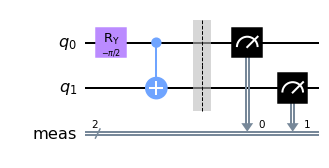

In [3]:
circuit1=circuit(pi/4)
zz_meas = measure_zz_circuit(circuit1)
zz_meas.draw(output = 'mpl')

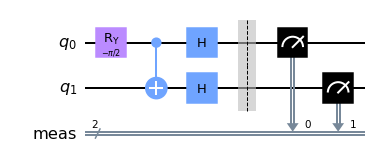

In [7]:
xx_meas = measure_xx_circuit(circuit1)
xx_meas.draw(output = 'mpl')

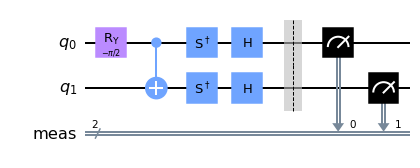

In [9]:
yy_meas = measure_yy_circuit(circuit1)
yy_meas.draw(output = 'mpl')

In [10]:
#Energia del hamiltoniano

def get_energy(given_circuit, num_shots = 10000):
    
    z = measure_totalinz(given_circuit, num_shots = num_shots)
    zi = z[0]
    iz = z[1]
 
    xx = measure_totalinx(given_circuit, num_shots = num_shots)
    
    yy = measure_totaliny(given_circuit, num_shots = num_shots)
    
    energy = (1/2)*zi + (1/2)*iz + (1)*1 + (1/2)*xx + (1/2)*yy
    
    return energy

In [11]:
angles = [0., 0.314159, 0.628319, 0.942478, 1.25664, 1.5708, 1.88496, 2.19911, \
2.51327, 2.82743, 3.14159, 3.45575, 3.76991, 4.08407, 4.39823, \
4.71239, 5.02655, 5.34071, 5.65487, 5.96903, 6.28319]

energies=[]

for i in angles:
    energy = get_energy(circuit(i))
    energies.append(energy)
    
energies
    

[-0.0032,
 0.1925,
 0.6842999999999999,
 1.3227,
 1.8156,
 1.9945,
 1.8164000000000002,
 1.3270000000000002,
 0.6892000000000001,
 0.198,
 0.0002000000000000001,
 0.18900000000000006,
 0.7011000000000001,
 1.2933,
 1.8107,
 1.9948000000000001,
 1.8019,
 1.3197,
 0.6821999999999999,
 0.191,
 0.0107]

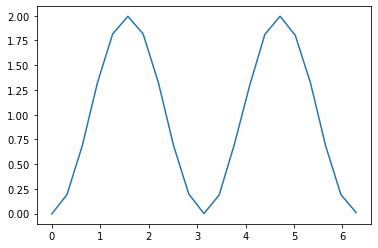

In [12]:
plt.plot(angles,energies)

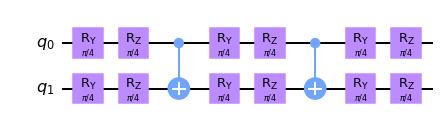

In [13]:
#Segundo estado de prueba
def circuit22(angle1, angle2):

    circ = QuantumCircuit(2)
    circ.ry(angle1, 0)
    circ.rz(angle1, 0)
    circ.ry(angle1, 1)
    circ.rz(angle1, 1)

    for i in range(2):
        circ.cx(0,1)
        circ.ry(angle2,0)
        circ.rz(angle2,0)
        circ.ry(angle2,1)
        circ.rz(angle2,1)
    
    return circ 

circuit2 = circuit22(pi/4, pi/4)
circuit2.draw(output = 'mpl')

In [17]:
angles = [0., 0.314159, 0.628319, 0.942478, 1.25664, 1.5708, 1.88496, 2.19911, \
2.51327, 2.82743, 3.14159, 3.45575, 3.76991, 4.08407, 4.39823, \
4.71239, 5.02655, 5.34071, 5.65487, 5.96903, 6.28319]

energies2=[]

for i in angles:
    energy = get_energy(circuit22(i,i))
    energies2.append(energy)
    
#energies2

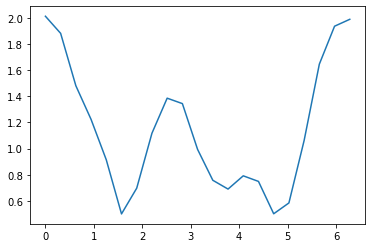

In [18]:
plt.plot(angles,energies2)

In [16]:
angles = [0., 0.314159, 0.628319, 0.942478, 1.25664, 1.5708, 1.88496, 2.19911, \
2.51327, 2.82743, 3.14159, 3.45575, 3.76991, 4.08407, 4.39823, \
4.71239, 5.02655, 5.34071, 5.65487, 5.96903, 6.28319]

energies2=[]

for i in angles:
    for j in angles:
        energy2 = get_energy(circuit22(i,j))
        energies2.append(energy2)
    
    
energies2

[1.9968,
 1.9058,
 1.5493,
 1.0974,
 0.8952,
 0.9948,
 1.0284,
 0.8011000000000001,
 0.5842,
 0.6845000000000001,
 0.9996999999999999,
 1.2573999999999999,
 1.3508,
 1.2128,
 1.0045000000000002,
 0.9994000000000001,
 1.2652999999999999,
 1.5914000000000001,
 1.8150000000000002,
 1.9433,
 2.0037000000000003,
 1.9963000000000002,
 1.8693,
 1.5137,
 1.1398,
 0.9549,
 0.9826000000000001,
 0.9137,
 0.6470999999999999,
 0.49670000000000003,
 0.6721,
 1.0301,
 1.3601000000000003,
 1.4473,
 1.2215,
 0.9702999999999999,
 1.0263,
 1.34,
 1.6469,
 1.8348999999999998,
 1.947,
 1.9956,
 1.9841000000000002,
 1.8301,
 1.4973,
 1.1639000000000002,
 0.9928999999999999,
 0.9126000000000001,
 0.7366,
 0.4999999999999999,
 0.47659999999999997,
 0.6791,
 1.0488999999999997,
 1.4071,
 1.5394,
 1.3392,
 1.0423,
 0.9928,
 1.2606,
 1.5891000000000002,
 1.7771,
 1.9251,
 1.9757,
 1.9162000000000001,
 1.8037999999999998,
 1.5064000000000002,
 1.2392,
 0.9979,
 0.7703,
 0.5343,
 0.4004999999999999,
 0.44660000000